# PSET -1 

Problem 1(b) and 1(c)

Logistic Regression : Classification Problem

## Given:
- Input $x^{(i)} \in R^{2}$

- $y^{(i)} \in \{-1,1\}$

## Task:

Compute the value of $\theta$ using the Newton's Method


## Solution:

Recall, that the generall update rule of $\theta$ using the Newton method is given by:

\begin{equation}
\theta = \theta - H^{-1}\nabla_{\theta}l(\theta)
\end{equation}

Here, $\nabla_{\theta} l(\theta)$ is, as usual, the vector of partial derivatives of $l(\theta)$ with respect to $\theta_{i}$'s; and H is an n-by-n matrix (actually, n+1-by-n+1, assuming that we include the intercept form) called the **Hessian**, whose entries are given by 

\begin{equation}
H_{ij} = \dfrac{\partial^{2}l(\theta)}{\partial\theta_{i}\partial\theta_{j}}
\end{equation}

And our $l(\theta)$ for logistic regression is given by (derived by the log of likelihood function):

\begin{equation}
l(\theta) = \sum_{i=1}^{m} y^{(i)}\log h({x^{(i)}})+(1-y^{(i)})\log(1-h(x^{(i)}))
\end{equation}

Where,

\begin{equation}
h(x^{(i)}) = g(z) =  \dfrac{1}{1+e^{-\theta^{T}x}}
\end{equation}

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [210]:
input_fields = ['x_1','x_2']
output = ['y']

In [251]:
dfx = pd.read_csv('../data/ds1_train.csv',usecols = input_fields)
dfy = pd.read_csv('../data/ds1_train.csv',usecols = output)
dfx_valid = pd.read_csv('../data/ds1_valid.csv',usecols = input_fields)
dfy_valid = pd.read_csv('../data/ds1_valid.csv',usecols=output)
dfy['y'] = dfy['y'].replace(0,-1)
dfy_valid['y'] = dfy_valid['y'].replace(0,-1)
dfy.head()

,y
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


In [356]:
ones = np.ones((dfx.shape[0],1))
x = np.hstack([ones, dfx])
x.shape[0]
x.shape

(800, 3)

In [357]:
theta=np.zeros(x.shape[1])
theta.shape

(3,)

In [256]:
np.zeros((3,1))

array([[0.],
       [0.],
       [0.]])

In [231]:
y = dfy['y'].values

In [359]:
y

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

In [233]:
allv = pd.read_csv('../data/ds1_train.csv')


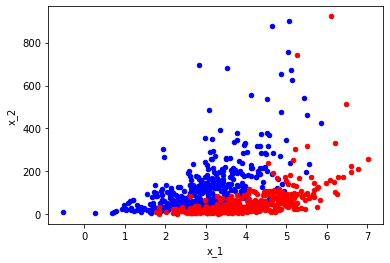

In [234]:
red = allv.query('y==1')
red
ax = plt.axes()
blue = allv.query('y==0')
blue.plot.scatter(x=0,y=1,ax=ax,color='blue')
red.plot.scatter(x=0,y=1,ax=ax,color='red')

\begin{equation}
J(\theta) = \dfrac{1}{m} \sum_{i=1}^{m}(1+e^{-y^{(i)}\theta^{T}x^{(i)}})
\end{equation}

\begin{equation}
\dfrac{\partial}{\partial \theta_{j}} J(\theta)= -\dfrac{1}{m}\sum_{i=1}^{m}(1-h_{\theta}(y^{(i)}x^{(i)})).y^{i}x_{j}^{i}
\end{equation}

\begin{equation}
H_{j,k} = \dfrac{1}{m}\sum_{i=1}^{m}h_{\theta}(y^{i}x^{i})(1-h_{\theta}(y^{i}x^{i})).x_{j}^{i}.x_{k}^{i}
\end{equation}

In [235]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [236]:
def gradient(theta,x,y):
    z = y*x.dot(theta)
    grad = -np.mean((1-sigmoid(z))*y*x.T,axis=1)
    # note that axis = 0: refers to axis parallel to rows
    # axis = 1, refers to axis parallel to columns
    return grad

In [237]:
gradient(theta,x,y)

array([-0.        , -0.27048487, 18.45229333])

In [238]:
def hessian(theta,x,y):
    hessM = np.zeros((x.shape[1],x.shape[1])) # hessian init
    z = y*x.dot(theta)
    for i in range(hessM.shape[0]):
        for j in range(hessM.shape[1]):
            if i<=j:
                hessM[i][j] = np.mean((sigmoid(z))*(1-sigmoid(z))*x[:,i]*x[:,j]) 
                #Note that we are calculating individual i,j of the hessian matrix and therefore we need not use 
                # the axis variable
            else:
                hessM[i][j] = hessM[j][i] # Since H = H.T , we can reduce the unnecessary computation
    return hess


In [239]:
#check hess function:
hessian(theta,x,y)
# Working without any errors

array([[2.50000000e-01, 8.78956314e-01, 2.31870598e+01],
       [8.78956314e-01, 3.40183221e+00, 9.12140762e+01],
       [2.31870598e+01, 9.12140762e+01, 5.38650439e+03]])

In [240]:
def newtonRaphson(theta,x,y,acc):
    noi = 0
    diff = 1
    thetas = []
    thetaOld = theta
    while(diff>acc):
        theta_old = theta.copy()
        thetas.append(theta_old)
        theta = theta - np.linalg.inv(hessian(theta,x,y)).dot(gradient(theta,x,y))
        diff = np.linalg.norm(abs(theta-theta_old),ord=1)
        delta = abs(theta-theta_old)
#         print(delta==diff)
#         print(diff)
        noi+=1
    return theta,noi,diff,thetas
        
        

In [241]:
acc = pow(10,-5)
ntheta,nnoi,ndiff,nthetas = newtonRaphson(theta,x,y,acc)

In [242]:
ntheta

array([-6.2600904 ,  2.47702781, -0.02991158])

In [243]:
nnoi

140

In [244]:
ndiff

9.752866706652652e-06

In [257]:
# nthetas

In [247]:
a = np.array([1,2,3])

In [248]:
np.mean(a)

2.0

In [252]:
dfy_valid.head()

,y
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0


In [253]:
dfx_valid

,x_1,x_2
0,2.177396,78.630076
1,3.952131,123.541573
2,3.351176,47.752517
3,2.074934,26.997730
4,3.579775,226.703779
...,...,...
95,3.795618,11.708285
96,3.953480,7.320390
97,3.863524,26.396698
98,4.917294,102.078713


In [301]:
predicty_v = np.vectorize(predicty)

In [322]:
def validate(ftheta,xvalid,yvalid):
    z = xvalid.dot(ftheta)
    predy = sigmoid(z)
    clssy = np.where(predy>=0.5,1,-1)
    acc = predy - clssy
    np
    return clssy
    

In [323]:
ones = np.ones((dfx_valid.shape[0],1))
xv = np.hstack([ones, dfx_valid])

In [324]:
ftheta = ntheta
ftheta

array([-6.2600904 ,  2.47702781, -0.02991158])

In [346]:
yv = dfy_valid.values

In [347]:
# yv
y_pred = validate(ftheta,xv,yv)

In [348]:
y_pred

array([-1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [349]:
out.shape

(100,)

In [353]:
predl = yv.T - y_pred

In [354]:
np.count_nonzero(predl==0)

90

In [332]:
yv.shape

(100, 1)

In [355]:
# accuracy rate: 90%